In [2]:
from sklearn.metrics.cluster import normalized_mutual_info_score
import sys
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import FlowCal

np.random.seed(1)

import random

from sklearn.cluster import KMeans

In [3]:
data_dir = "../SamusikData/"
s01_fn = data_dir + "BM2_cct_normalized_01_non-Neutrophils.fcs"
s01 = FlowCal.io.FCSData(s01_fn)

# Only relevant indexes are 10-47
s01 = s01[:, 10:47]

# Transform data with arcsinh
s01 = np.arcsinh(s01)
s01_umap = np.load("../Embeddings/s01_umap.npy")
s01_tsne = np.load("../Embeddings/s01_tsne.npy")
s01_pca = np.load("../Embeddings/s01_pca.npy")
s01_2layer = np.load("../Embeddings/s01_2layer.npy")
s01_6layer = np.load("../Embeddings/s01_6layer.npy")
s01_vae = np.load("../Embeddings/s01_vae.npy")

In [4]:
sample_size = 20000
k = 10
num_samples = 5

In [5]:
s01_Embeddings = [
    s01_umap,
    s01_tsne,
    s01_2layer,
    s01_6layer,
    s01_vae   
        ]

In [6]:
Mean_Mutuals = []
SD_Mutuals = []

In [6]:
count = 1
for s01_embedding in s01_Embeddings:
    print("Working on embedding: " + str(count))
    count += 1
    temp_mutual_info = np.zeros(num_samples)
    for i in range(num_samples):
        print("\tIteration: " + str(i+1))
        indices = random.sample(range(s01.shape[0]), sample_size)
        s01_full = s01[indices]
        s01_embed = s01_embedding[indices]
        kmeans_full = KMeans(n_clusters=k, random_state=0).fit(s01_full)

        kmeans_embed = KMeans(n_clusters=k, random_state=0).fit(s01_embed)

        temp_mutual_info[i] = normalized_mutual_info_score(kmeans_full.labels_, kmeans_embed.labels_)
    Mean_Mutuals.append(np.mean(temp_mutual_info))
    SD_Mutuals.append(np.std(temp_mutual_info))

Working on embedding: 1
	Iteration: 1
	Iteration: 2
	Iteration: 3
	Iteration: 4
	Iteration: 5
Working on embedding: 2
	Iteration: 1
	Iteration: 2
	Iteration: 3
	Iteration: 4
	Iteration: 5
Working on embedding: 3
	Iteration: 1
	Iteration: 2
	Iteration: 3
	Iteration: 4
	Iteration: 5
Working on embedding: 4
	Iteration: 1
	Iteration: 2
	Iteration: 3
	Iteration: 4
	Iteration: 5
Working on embedding: 5
	Iteration: 1
	Iteration: 2
	Iteration: 3
	Iteration: 4
	Iteration: 5


In [27]:
Mean_Mutuals = np.array(Mean_Mutuals)
SD_Mutuals = np.array(SD_Mutuals)

In [47]:
Mutuals_df = (pd.DataFrame([Mean_Mutuals, SD_Mutuals]))
#Mutuals_df = Mutuals_df.transpose()
Mutuals_df.columns = ["UMAP", "tSNE", "AE2layer", "AE6layer", "VAE"]
Mutuals_df.index = ["Mean", "SD"]
Mutuals_df.to_csv("NormalizedMutualInfo_s01.csv", index=True)
Mutuals_df

,UMAP,tSNE,AE2layer,AE6layer,VAE
Mean,0.807260,0.748028,0.513444,0.653010,0.704781
SD,0.007697,0.002948,0.002284,0.003664,0.001725


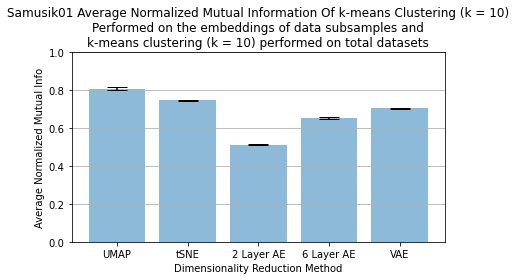

In [7]:
Mutuals_df = pd.read_csv("NormalizedMutualInfo_s01.csv", index_col=0)
Means = Mutuals_df.loc["Mean"]
SDs = Mutuals_df.loc["SD"]
Methods = [ 'UMAP', 'tSNE', '2 Layer AE', '6 Layer AE', 'VAE']
fig, ax = plt.subplots()
x_pos = np.arange(len(Methods))
#ax.bar(x_pos, np.array(Means[0:1])[0],  align='center', alpha=0.5, ecolor='black', capsize=10)

ax.bar(x_pos, Means, yerr=SDs, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Average Normalized Mutual Info')
ax.set_xlabel('Dimensionality Reduction Method')
ax.set_xticks(x_pos)
ax.set_xticklabels(Methods)
plt.title("Samusik01 Average Normalized Mutual Information Of k-means Clustering (k = 10)\nPerformed on the embeddings of data subsamples and\nk-means clustering (k = 10) performed on total datasets")
ax.yaxis.grid(True)
ax.set_ylim([0.0, 1.0])
# Save the figure and show
plt.savefig('../Figures/NormalizedMutualInfo_s01.png', bbox_inches = 'tight')
plt.tight_layout()

In [69]:
data_dir = "../LevineData/"
levine_fn = data_dir + "Levine_32dim_notransform.fcs"
levine = FlowCal.io.FCSData(levine_fn)

# Columns 4-36 (0-indexed) are relevant markers
# column 39 (0-indexed) is labels

# 60% of the dataset is garbage
non_garbage_idx = np.where(np.isnan(levine[:, 39]) == False)
levine = levine[non_garbage_idx]

levine = levine[:, 4:36]

# Transform data with arcsinh
levine = np.arcsinh(np.array(levine))

In [70]:
# Load other embeddings
levine_tsne = np.load("../Embeddings/levine_tsne.npy")
levine_umap = np.load("../Embeddings/levine_umap.npy")
levine_2layer = np.load("../Embeddings/levine_2layer.npy")
levine_6layer = np.load("../Embeddings/levine_6layer.npy")
levine_vae = np.load("../Embeddings/levine_vae.npy")

In [71]:
sample_size = 20000
k = 10
num_samples = 5

In [72]:
levine_Embeddings = [
    levine_umap,
    levine_tsne,
    levine_2layer,
    levine_6layer,
    levine_vae   
        ]

In [73]:
Mean_Mutuals = []
SD_Mutuals = []

In [74]:
count = 1
for levine_embedding in levine_Embeddings:
    print("Working on embedding: " + str(count))
    count += 1
    temp_mutual_info = np.zeros(num_samples)
    for i in range(num_samples):
        print("\tIteration: " + str(i+1))
        indices = random.sample(range(levine.shape[0]), sample_size)
        levine_full = levine[indices]
        levine_embed = levine_embedding[indices]
        kmeans_full = KMeans(n_clusters=k, random_state=0).fit(levine_full)

        kmeans_embed = KMeans(n_clusters=k, random_state=0).fit(levine_embed)

        temp_mutual_info[i] = normalized_mutual_info_score(kmeans_full.labels_, kmeans_embed.labels_)
    Mean_Mutuals.append(np.mean(temp_mutual_info))
    SD_Mutuals.append(np.std(temp_mutual_info))

Working on embedding: 1
	Iteration: 1
	Iteration: 2
	Iteration: 3
	Iteration: 4
	Iteration: 5
Working on embedding: 2
	Iteration: 1
	Iteration: 2
	Iteration: 3
	Iteration: 4
	Iteration: 5
Working on embedding: 3
	Iteration: 1
	Iteration: 2
	Iteration: 3
	Iteration: 4
	Iteration: 5
Working on embedding: 4
	Iteration: 1
	Iteration: 2
	Iteration: 3
	Iteration: 4
	Iteration: 5
Working on embedding: 5
	Iteration: 1
	Iteration: 2
	Iteration: 3
	Iteration: 4
	Iteration: 5


In [75]:
Mean_Mutuals = np.array(Mean_Mutuals)
SD_Mutuals = np.array(SD_Mutuals)

In [76]:
Mutuals_df = (pd.DataFrame([Mean_Mutuals, SD_Mutuals]))
#Mutuals_df = Mutuals_df.transpose()
Mutuals_df.columns = ["UMAP", "tSNE", "AE2layer", "AE6layer", "VAE"]
Mutuals_df.index = ["Mean", "SD"]
Mutuals_df.to_csv("NormalizedMutualInfo_levine.csv", index=True)
Mutuals_df

,UMAP,tSNE,AE2layer,AE6layer,VAE
Mean,0.897163,0.795538,0.614656,0.785405,0.858013
SD,0.001821,0.010897,0.007354,0.006631,0.026198


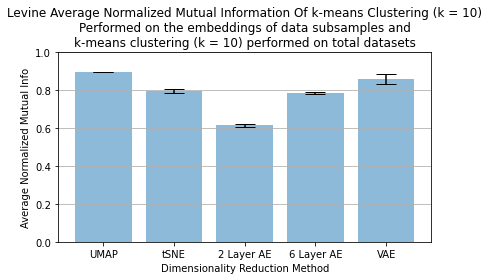

In [77]:
Mutuals_df = pd.read_csv("NormalizedMutualInfo_levine.csv", index_col=0)
Means = Mutuals_df.loc["Mean"]
SDs = Mutuals_df.loc["SD"]
Methods = [ 'UMAP', 'tSNE', '2 Layer AE', '6 Layer AE', 'VAE']
fig, ax = plt.subplots()
x_pos = np.arange(len(Methods))
#ax.bar(x_pos, np.array(Means[0:1])[0],  align='center', alpha=0.5, ecolor='black', capsize=10)

ax.bar(x_pos, Means, yerr=SDs, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Average Normalized Mutual Info')
ax.set_xlabel('Dimensionality Reduction Method')
ax.set_xticks(x_pos)
ax.set_xticklabels(Methods)
plt.title("Levine Average Normalized Mutual Information Of k-means Clustering (k = 10)\nPerformed on the embeddings of data subsamples and\nk-means clustering (k = 10) performed on total datasets")
ax.yaxis.grid(True)
ax.set_ylim([0.0, 1.0])
# Save the figure and show
plt.savefig('../Figures/NormalizedMutualInfo_levine.png', bbox_inches = 'tight')
plt.tight_layout()